# Project: Movie Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this report, we are going to investigate the dataset containing information about 10,000 movies collected from The Movie Database(TMDb). The dataset contains information about user ratings and global revnues as well as movie budgets. In addition, the dataset have information about cast and directors of each movie. 

In our analysis we will try to tackle those questions:

1- Which genres are most popular from year to year?

2- What kinds of properties are associated with movies that have high revenues?

### Importing necesary libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
data = pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
data.tail()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
10861,0.080598,0,0,95,Documentary,11,7.4,1966
10862,0.065543,0,0,176,Action|Adventure|Drama,20,5.7,1966
10863,0.065141,0,0,94,Mystery|Comedy,11,6.5,1966
10864,0.064317,0,0,80,Action|Comedy,22,5.4,1966
10865,0.035919,19000,0,74,Horror,15,1.5,1966


From last few rows, one can note that budget and revenue has some zero values. This generally don't make sense so we are going to investigate this problem

In [28]:
data[(data.budget ==0) | (data.revenue==0)]

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
30,3.927333,0,29355203,103,Mystery|Drama,425,6.4,2015
36,3.358321,0,22354572,101,Crime|Drama|Mystery,474,6.2,2015
48,2.932340,30000000,0,92,Thriller|Crime|Drama,481,5.3,2015
67,2.331636,20000000,0,96,Crime|Thriller|Action,280,5.4,2015
72,2.272044,0,45895,95,Thriller,81,5.5,2015
...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,95,Documentary,11,7.4,1966
10862,0.065543,0,0,176,Action|Adventure|Drama,20,5.7,1966
10863,0.065141,0,0,94,Mystery|Comedy,11,6.5,1966
10864,0.064317,0,0,80,Action|Comedy,22,5.4,1966


About 7k of data doesn't have information about budget or revenue. Since this a large portion of data, we will try to fill these values by mean value. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see from the 21 features information above, there are a lot of missing values. But, not all columns will be used in our analysis. So, we will start by choosing the columns that can help us in our analysis. For example, we don't care about difference between USD before and after 2008 in this analysis. 

Datetypes in this data set are reasonable and nothing need to be done for this aspect. 

Based on the reduced dataset, we will decide about missing values whether to fill missing values or remove it entirely . 

### Data Cleaning 

#### a- Drop unncessary columns

In [8]:
data.drop(['id','imdb_id','cast','original_title','homepage','tagline','keywords','overview',\
            'production_companies','production_companies','budget_adj','revenue_adj','release_date','director'] , axis = 1 ,inplace = True)
data.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   release_year  10866 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 679.2+ KB


#### b- Drop missing values

Since the reduced dataset has few missing values we will simply drop them. 

In [10]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10843 non-null  float64
 1   budget        10843 non-null  int64  
 2   revenue       10843 non-null  int64  
 3   runtime       10843 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_count    10843 non-null  int64  
 6   vote_average  10843 non-null  float64
 7   release_year  10843 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 762.4+ KB


#### c- Fill zeros in budget and revenue columns

In [33]:
data.budget.replace(0,data.budget.mean(),inplace = True)
data.revenue.replace(0,data.revenue.mean(),inplace = True)

check both columns again

In [34]:
data[(data.budget ==0) | (data.revenue==0)]

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year


Now, we have our dataset ready to be explored.

In [35]:
data.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,137,Action|Crime|Thriller,2947,7.3,2015


In [36]:
data.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000
mean,0.647456,2.232640e+07,6.196510e+07,102.137508,217.813705,5.973974,2001.315595
std,1.000986,2.803475e+07,1.111241e+08,31.293320,576.155351,0.934260,12.813298
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.208253,1.465672e+07,3.990779e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.384555,1.465672e+07,3.990779e+07,99.000000,38.000000,6.000000,2006.000000
75%,0.715349,1.500000e+07,3.990779e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


Let's start by exploring available ranges for numeric data in our dataset by creating a histogram of all numeric data to display their distributions. 

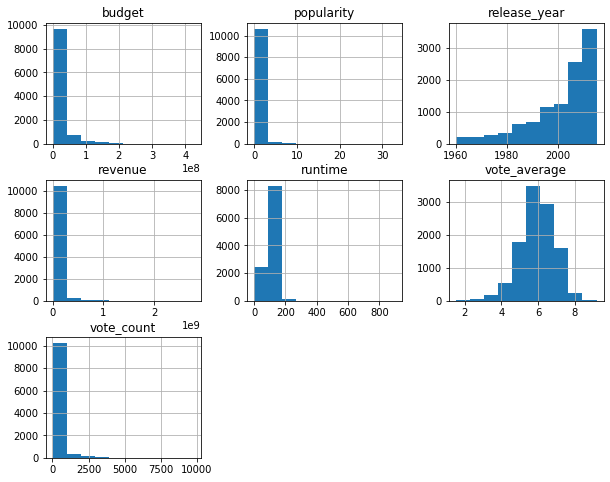

In [13]:
data.hist(figsize = (10,8));

### 1- Which genres are most popular from year to year?

To answer this question we will try to find all unique genres available in the dataset. Then, we will find average popularity and rating scores by each genre.

#### Unique genres 

First, let's have a look on this column

In [37]:
data.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10843, dtype: object

Since each movie can have multiple genres seperated by "|", we will first split each genre value then find unique genres in the whole dataset. 

In [38]:
genres = [x.split('|') for x in data.genres.to_list()]
unique_genres = list(set([item for sublist in genres for item in sublist]))
print('There are {} unique genres in the dataset'.format(len(unique_genres)))

There are 20 unique genres in the dataset


How can we find popular genres? one thing we can do is to find all movies that have this genre, then calculate average popularity and rating for all these movies. By looping through all genres, we can have a nice list showing us average popularity and ratings for each genre. Finally we will look at bar graph of results and do some conclusions. 

#### Caclulate average popularity & rating for each genre

In [39]:
pop_vot = pd.DataFrame(columns = ['Avg_pop', 'Avg_rating'] , index = unique_genres)
for g in unique_genres:
    movie_genres = data[data['genres'].str.contains(g, na = False )]  
    pop_vot.Avg_rating[g] = movie_genres.vote_average.mean()
    pop_vot.Avg_pop[g] = movie_genres.popularity.mean()
pop_vot

,Avg_pop,Avg_rating
Music,0.487321,6.48039
Family,0.786668,5.99756
TV Movie,0.270896,5.78802
Western,0.590615,6.08303
Mystery,0.690012,5.94679
Comedy,0.592607,5.90517
Romance,0.592082,6.04287
Documentary,0.181432,6.90846
Crime,0.744821,6.12406
War,0.727683,6.29778


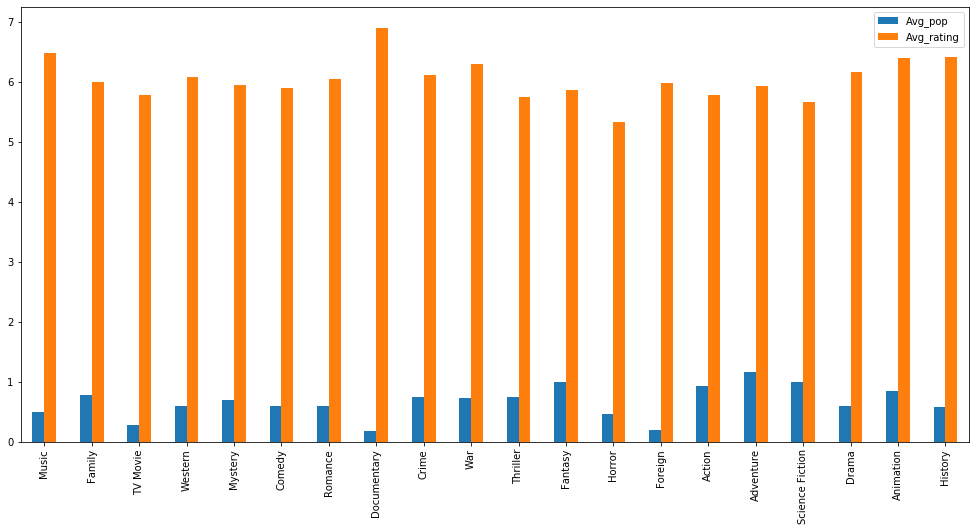

In [40]:
pop_vot.plot(kind = 'bar',figsize = (17,8));

Interestingly, Documentary genre acheieved top score in Average rating metric while Adventure genre attracts more people as evident from average popularity score. 

### 2- What kinds of properties are associated with movies that have high revenues?

One way to do that by using scatter plots with other features to see highly correlated ones. Runing the following cell may take some minutes. 

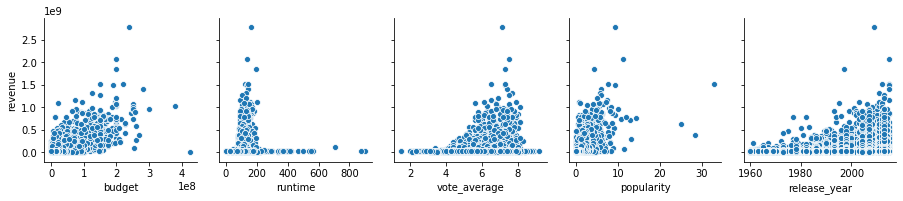

In [41]:
sns.pairplot(data , y_vars = ['revenue'], \
             x_vars = ['budget', 'runtime', 'vote_average','popularity','release_year']);

It seems like top associated properties with high-revenues movies in our data set are budget and release_year. Popularity and vote_average have also considerable link with revenues. 

<a id='conclusions'></a>
## Conclusions

In this brief analysis we studied attributes of successful movies from two prepectives,  Genres and Revenues. We have done quick analysis to find most popular genres and important features in getting high revenues. A lot more can be explored further by studying effects of directors and actors on afromentioned aspects. This may need kind of natural language processing exploaration which is out of scope for this quick analysis. 



### Limitations

Since about 70% of the dataset has outliars regarding both budget and revenue features, this affects the results of this analysis espicially for second question. Filling with mean values tries to reduce this effect but It is still exist. 